#Calcolo di indici alternativi all'NDVI

in questo notebook si vogliono applicare formule alternative per il calcolo dell'NDVI poichè abbiamo a disposizione non immagini multispettrali (che mettono a disposizone la banda dell'infrarosso NIR) bensì immagini jpg o png, che veicolano informazioni legate alle bande RGB.

In [ ]:
# Installazione delle librerie necessarie (se non già installate)
!pip install opencv-python-headless matplotlib

#VARI

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carica l'immagine PNG
# Sostituisci 'path_to_image.png' con il percorso del tuo file
image_path = "/content/201209_cropped.png"
image = cv2.imread(image_path)

# OpenCV carica le immagini in formato BGR, quindi bisogna convertirle in RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Estrai le bande (R, G, B)
R = image_rgb[:, :, 0].astype(float)
G = image_rgb[:, :, 1].astype(float)
B = image_rgb[:, :, 2].astype(float)

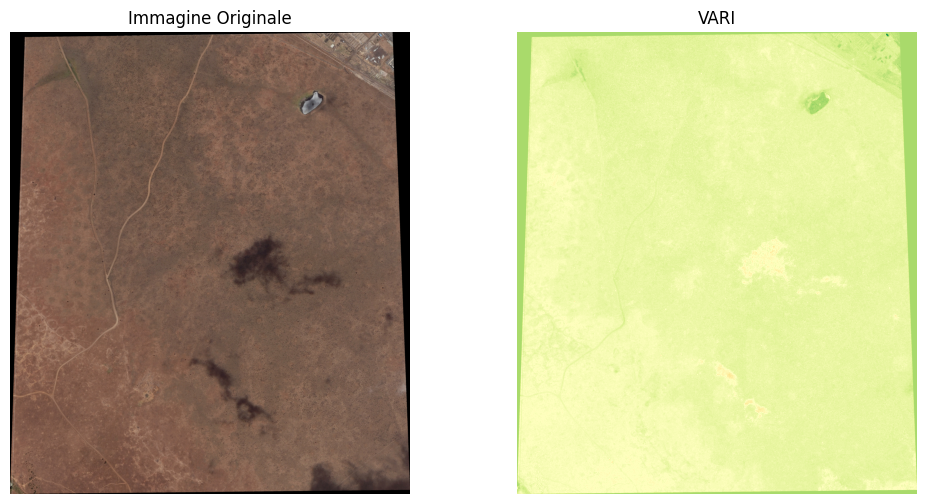

Immagine VARI normalizzata salvata in: /content/vari_normalized.png


In [ ]:
# Calcolo del VARI
# Evitiamo divisioni per zero aggiungendo un valore epsilon molto piccolo
epsilon = 1e-6
VARI = (G - R) / (G + R - B + epsilon)

# Normalizza i valori del VARI per una migliore visualizzazione (opzionale)
VARI_normalized = (VARI - np.min(VARI)) / (np.max(VARI) - np.min(VARI))

# Visualizza l'immagine originale e il VARI calcolato
plt.figure(figsize=(12, 6))

# Immagine originale
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Immagine Originale")
plt.axis("off")

# Immagine VARI
plt.subplot(1, 2, 2)
plt.imshow(VARI_normalized, cmap="RdYlGn")  # Usa una mappa di colori adatta alla vegetazione
plt.title("VARI")
plt.axis("off")

plt.show()

# Salva l'immagine VARI normalizzata con Matplotlib
output_path = "/content/vari_normalized.png"
plt.imsave(output_path, VARI_normalized, cmap="RdYlGn")
print(f"Immagine VARI normalizzata salvata in: {output_path}")

#TGI

Immagine TGI normalizzata salvata in: /content/tgi_normalized.png


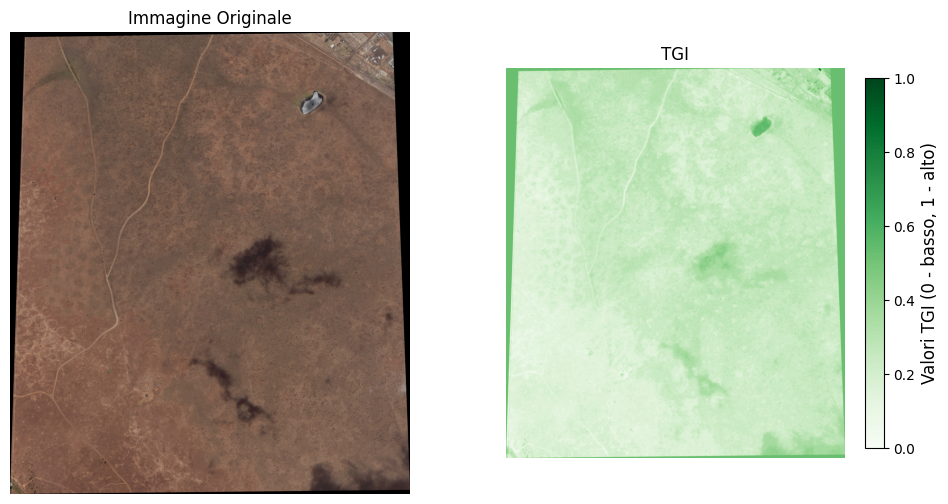

In [ ]:
# Calcolo del TGI
TGI = -0.5 * (R - 0.39 * G - 0.61 * B)

# Normalizza i valori del TGI per una migliore visualizzazione (opzionale)
TGI_normalized = (TGI - np.min(TGI)) / (np.max(TGI) - np.min(TGI))

# Salva l'immagine del TGI normalizzato
tgi_output_path = "/content/tgi_normalized.png"
plt.imsave(tgi_output_path, TGI_normalized, cmap="RdYlGn")
plt.imsave("/content/tgi_normalized_green.png", TGI_normalized, cmap="Greens")
print(f"Immagine TGI normalizzata salvata in: {tgi_output_path}")

# Visualizza l'immagine originale e il TGI calcolato
plt.figure(figsize=(12, 6))

# Immagine originale
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Immagine Originale")
plt.axis("off")

# Immagine TGI
plt.subplot(1, 2, 2)
#plt.imshow(TGI_normalized, cmap="RdYlGn")  # Usa una mappa di colori adatta alla vegetazione
img = plt.imshow(TGI_normalized, cmap="Greens")
plt.title("TGI")
plt.axis("off")

# Aggiungi una barra della leggenda (colorbar) specificando il mappable
cbar = plt.colorbar(img, orientation="vertical", shrink=0.8)
cbar.set_label("Valori TGI (0 - basso, 1 - alto)", fontsize=12)


plt.show()

#GLI

Immagine GLI normalizzata salvata in: /content/gli_normalized.png


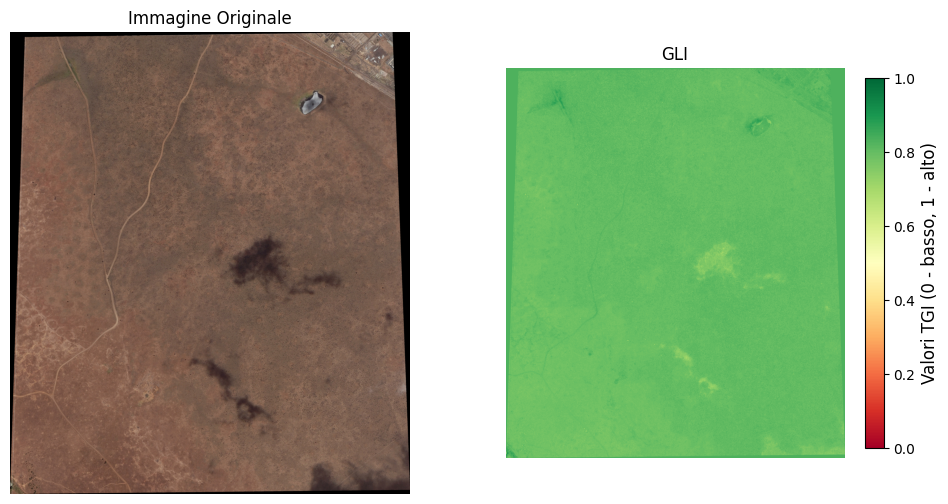

In [ ]:
# Calcolo del GLI
numerator = 2 * G - R - B
denominator = 2 * G + R + B + 1e-6  # Aggiungiamo un piccolo epsilon per evitare divisioni per zero
GLI = numerator / denominator

# Normalizza i valori del GLI per la visualizzazione (opzionale)
GLI_normalized = (GLI - np.min(GLI)) / (np.max(GLI) - np.min(GLI))

# Salva l'immagine del GLI normalizzato
gli_output_path = "/content/gli_normalized.png"
plt.imsave(gli_output_path, GLI_normalized, cmap="RdYlGn")
print(f"Immagine GLI normalizzata salvata in: {gli_output_path}")

# Visualizza l'immagine originale e il GLI calcolato
plt.figure(figsize=(12, 6))

# Immagine originale
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Immagine Originale")
plt.axis("off")

# Immagine GLI
plt.subplot(1, 2, 2)
img = plt.imshow(GLI_normalized, cmap="RdYlGn")  # Usa una mappa di colori adatta alla vegetazione
plt.title("GLI")
plt.axis("off")

# Aggiungi una barra della leggenda (colorbar)
cbar = plt.colorbar(img, orientation="vertical", shrink=0.8)
cbar.set_label("Valori TGI (0 - basso, 1 - alto)", fontsize=12)

plt.show()


#NGRDI (Normalized Green-Red Difference Index)

Immagine NGRDI normalizzata salvata in: ngrdi_normalized.png


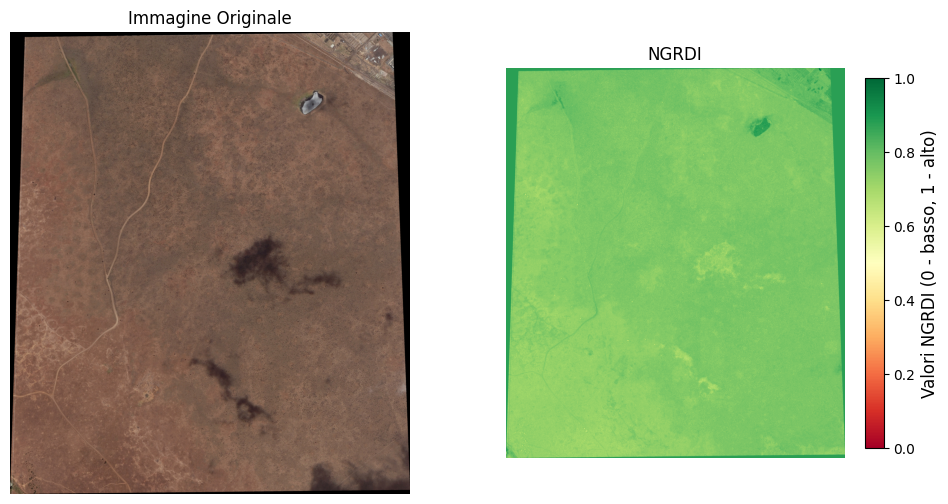

In [ ]:
# Calcolo del NGRDI
numerator = G - R
denominator = G + R + 1e-6  # Aggiungiamo un piccolo epsilon per evitare divisioni per zero
NGRDI = numerator / denominator

# Normalizza i valori del NGRDI per la visualizzazione (opzionale)
NGRDI_normalized = (NGRDI - np.min(NGRDI)) / (np.max(NGRDI) - np.min(NGRDI))

# Salva l'immagine del NGRDI normalizzato
ngrdi_output_path = "ngrdi_normalized.png"
plt.imsave(ngrdi_output_path, NGRDI_normalized, cmap="RdYlGn")
print(f"Immagine NGRDI normalizzata salvata in: {ngrdi_output_path}")

# Visualizza l'immagine originale e il NGRDI calcolato
plt.figure(figsize=(12, 6))

# Immagine originale
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Immagine Originale")
plt.axis("off")

# Immagine NGRDI
plt.subplot(1, 2, 2)
img = plt.imshow(NGRDI_normalized, cmap="RdYlGn")  # Usa una mappa di colori adatta alla vegetazione
plt.title("NGRDI")
plt.axis("off")

# Aggiungi una barra della leggenda (colorbar)
cbar = plt.colorbar(img, orientation="vertical", shrink=0.8)
cbar.set_label("Valori NGRDI (0 - basso, 1 - alto)", fontsize=12)

plt.show()


#ExG

Immagine ExG normalizzata salvata in: /content/exg_normalized.png


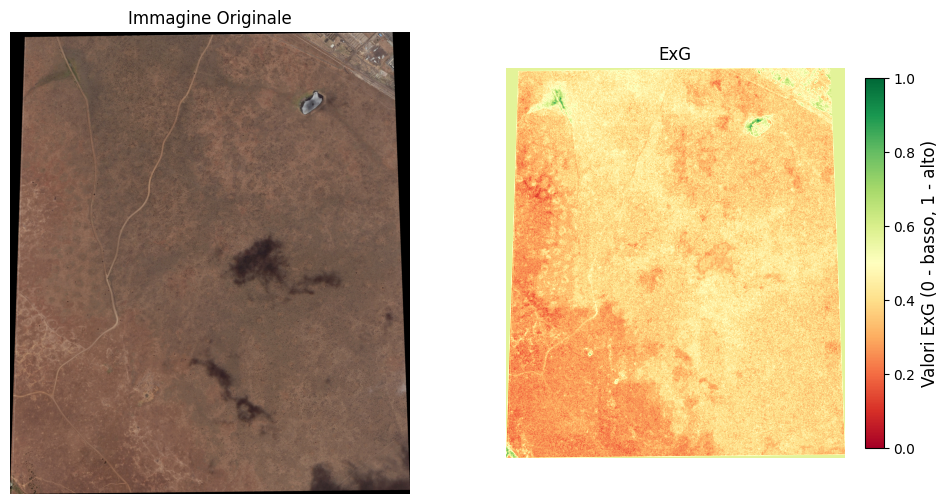

In [ ]:
# Calcolo del ExG
ExG = 2 * G - R - B

# Normalizza i valori del ExG per la visualizzazione (opzionale)
ExG_normalized = (ExG - np.min(ExG)) / (np.max(ExG) - np.min(ExG))

# Salva l'immagine del ExG normalizzato
exg_output_path = "/content/exg_normalized.png"
plt.imsave(exg_output_path,ExG_normalized, cmap="RdYlGn")
print(f"Immagine ExG normalizzata salvata in: {exg_output_path}")

# Visualizza l'immagine originale e il ExG calcolato
plt.figure(figsize=(12, 6))

# Immagine originale
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Immagine Originale")
plt.axis("off")

# Immagine ExG
plt.subplot(1, 2, 2)
img = plt.imshow(ExG_normalized, cmap="RdYlGn")  # Usa una mappa di colori adatta alla vegetazione
plt.title("ExG")
plt.axis("off")

# Aggiungi una barra della leggenda (colorbar)
cbar = plt.colorbar(img, orientation="vertical", shrink=0.8)
cbar.set_label("Valori ExG (0 - basso, 1 - alto)", fontsize=12)

plt.show()

#Media degli indici per ogni immagine

In [ ]:
import pandas as pd

# Creiamo una lista per raccogliere i risultati
results = []

# Percorso delle immagini (sostituisci con i tuoi percorsi o genera dinamicamente)
image_paths = ["/content/201209_cropped.png", "/content/201309_cropped.png", "/content/201409_cropped.png"]

# Itera su ogni immagine
for image_path in image_paths:
    # Carica l'immagine
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Estrai le bande RGB
    R = image_rgb[:, :, 0].astype(float)
    G = image_rgb[:, :, 1].astype(float)
    B = image_rgb[:, :, 2].astype(float)

    # Calcola gli indici
    VARI = (G - R) / (G + R - B + 1e-6)
    TGI = -0.5 * (R - 0.39 * G - 0.61 * B)
    GLI = (2 * G - R - B) / (2 * G + R + B + 1e-6)
    NGRDI = (G - R) / (G + R + 1e-6)
    ExG = 2 * G - R - B

    # Calcola i valori medi degli indici
    results.append({
        "image": image_path,
        "mean_VARI": np.nanmean(VARI),
        "mean_TGI": np.nanmean(TGI),
        "mean_GLI": np.nanmean(GLI),
        "mean_NGRDI": np.nanmean(NGRDI),
        "mean_ExG": np.nanmean(ExG)
    })

# Crea un DataFrame
df = pd.DataFrame(results)

# Salva il DataFrame come file CSV
output_csv = "indices_summary.csv"
df.to_csv(output_csv, index=False)
print(f"File CSV salvato in: {output_csv}")


File CSV salvato in: indices_summary.csv


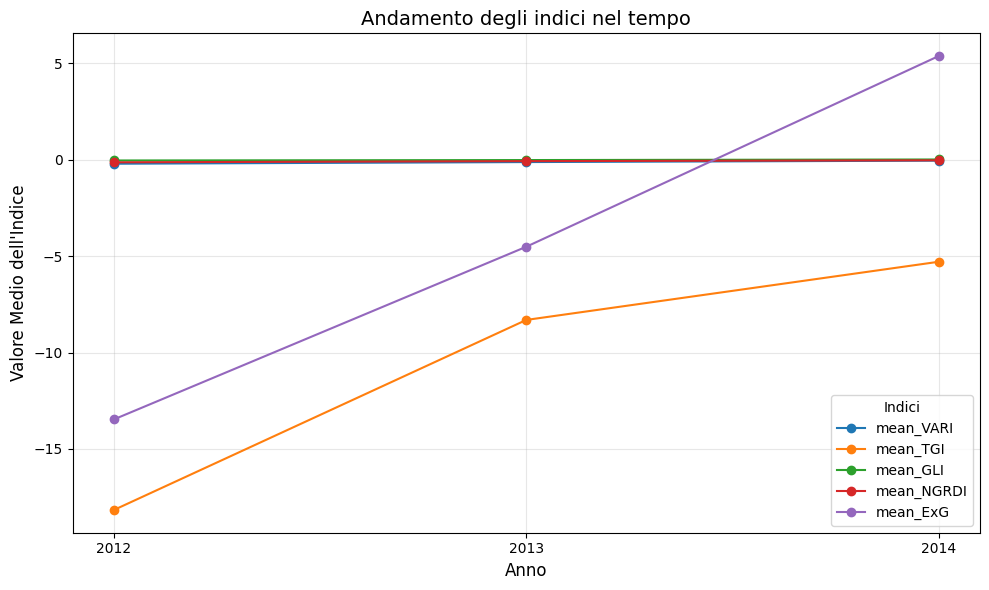

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV
csv_path = "indices_summary.csv"
df = pd.read_csv(csv_path)

# Aggiungi una colonna per gli anni
years = [2012, 2013, 2014]  # Anni corrispondenti alle immagini
df["year"] = years

# Imposta l'anno come asse x
df = df.sort_values("year")  # Ordina per anno

# Crea il grafico per ogni indice
plt.figure(figsize=(10, 6))

for index in ["mean_VARI", "mean_TGI", "mean_GLI", "mean_NGRDI", "mean_ExG"]:
    plt.plot(df["year"], df[index], marker="o", label=index)

# Personalizza il grafico
plt.title("Andamento degli indici nel tempo", fontsize=14)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Valore Medio dell'Indice", fontsize=12)
plt.xticks(df["year"])
plt.legend(title="Indici", fontsize=10)
plt.grid(alpha=0.3)

# Mostra il grafico
plt.tight_layout()
plt.show()

#Valori per ogni pixel dell'immagine

questo codice potrebbe essere utile per ritagliare una zona di immagine che contiene un solo FR e analizzarne i cambiamenti in modo puntuale stimando i valori di questi indici per ogni pixel contenuto nel ritaglio relativo al solo FR.

In [ ]:
# Importa le librerie necessarie
import pandas as pd
import numpy as np

# Percorso dell'immagine da analizzare
image_path = "/content/201209_cropped.png"

# Carica l'immagine
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Estrai le bande RGB
R = image_rgb[:, :, 0].astype(float)
G = image_rgb[:, :, 1].astype(float)
B = image_rgb[:, :, 2].astype(float)

# Calcola gli indici per ogni pixel
VARI = (G - R) / (G + R - B + 1e-6)
TGI = -0.5 * (R - 0.39 * G - 0.61 * B)
GLI = (2 * G - R - B) / (2 * G + R + B + 1e-6)
NGRDI = (G - R) / (G + R + 1e-6)

# Ottieni le coordinate dei pixel
height, width = VARI.shape
coords = [(x, y) for x in range(width) for y in range(height)]

# Crea un DataFrame per raccogliere i dati
data = {
    "x": [coord[0] for coord in coords],
    "y": [coord[1] for coord in coords],
    "VARI": VARI.flatten(),
    "TGI": TGI.flatten(),
    "GLI": GLI.flatten(),
    "NGRDI": NGRDI.flatten()
}

df = pd.DataFrame(data)

# Salva il DataFrame in un file CSV
output_csv = "pixel_indices.csv"
df.to_csv(output_csv, index=False)
print(f"File CSV salvato in: {output_csv}")


File CSV salvato in: pixel_indices.csv


#Alternative_NDVI function

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import os
import numpy as np
from PIL import Image

In [42]:
# Specificare il percorso della cartella con le immagini su Google Drive
input_folder = "/content/drive/MyDrive/Colab Notebooks/Mat4Pat/GEP/Kenya/cropped"

# Specificare il percorso della cartella in cui salvare i risultati
output_base_folder = "/content/drive/MyDrive/Colab Notebooks/Mat4Pat/GEP/Kenya/ndvi"

# Creare la cartella di output se non esiste
os.makedirs(output_base_folder, exist_ok=True)

#VARI function

In [43]:
def vari_ndvi(r,g,b, image_name, output_folder):
  try:
      # Calcolo del VARI
      # Evitiamo divisioni per zero aggiungendo un valore epsilon molto piccolo
      epsilon = 1e-6
      VARI = (g - r) / (g + r - b + epsilon)

      # Normalizza i valori del VARI per una migliore visualizzazione (opzionale)
      VARI_normalized = (VARI - np.min(VARI)) / (np.max(VARI) - np.min(VARI))

      # Converti in immagine e salva
      VARI_image = Image.fromarray((VARI_normalized * 255).astype(np.uint8))

      # Salva VARI_normalized
      VARI_image.save(os.path.join(output_folder, f"{image_name}_vari_normalized.png"))
  except Exception as e:
      print(f"VARI Calculation Error with {image_name}: {e}")

#TGI function

In [44]:
def tgi_ndvi(r,g,b, image_name, output_folder):
  try:
      # Calcolo del TGI
      TGI = -0.5 * (r - 0.39 * g - 0.61 * b)

      # Normalizza i valori del TGI per una migliore visualizzazione (opzionale)
      TGI_normalized = (TGI - np.min(TGI)) / (np.max(TGI) - np.min(TGI))

      # Converti in immagine e salva
      TGI_image = Image.fromarray((TGI_normalized * 255).astype(np.uint8))

      # Salva TGI_normalized
      TGI_image.save(os.path.join(output_folder, f"{image_name}_tgi_normalized.png"))

      print(f"Elaborata: {image_name} -> TGI salvato in {output_folder}")
  except Exception as e:
      print(f"TGI Calculation Error with {image_name}: {e}")

#GLI function

In [45]:
def gli_ndvi(r,g,b, image_name, output_folder):
  try:
    # Calcolo del GLI
    numerator = 2 * g - r - b
    denominator = 2 * g + r + b + 1e-6  # Aggiungiamo un piccolo epsilon per evitare divisioni per zero
    GLI = numerator / denominator

    # Normalizza i valori del GLI per la visualizzazione (opzionale)
    GLI_normalized = (GLI - np.min(GLI)) / (np.max(GLI) - np.min(GLI))

    # Converti in immagine e salva
    GLI_image = Image.fromarray((GLI_normalized * 255).astype(np.uint8))

    # Salva GLI_normalized
    GLI_image.save(os.path.join(output_folder, f"{image_name}_gli_normalized.png"))

    print(f"Elaborata: {image_name} -> GLI salvato in {output_folder}")

  except Exception as e:
    print(f"GLI Calculation Error with {image_name}: {e}")

#NGRDI function

In [46]:
def ngrdi_ndvi(r,g,b, image_name, output_folder):
  try:
    # Calcolo del NGRDI
    numerator = g - r
    denominator = g + r + 1e-6  # Aggiungiamo un piccolo epsilon per evitare divisioni per zero
    NGRDI = numerator / denominator

    # Normalizza i valori del NGRDI per la visualizzazione (opzionale)
    NGRDI_normalized = (NGRDI - np.min(NGRDI)) / (np.max(NGRDI) - np.min(NGRDI))

    # Converti in immagine e salva
    NGRDI_image = Image.fromarray((NGRDI_normalized * 255).astype(np.uint8))

    # Salva NGRDI_normalized
    NGRDI_image.save(os.path.join(output_folder, f"{image_name}_ngrdi_normalized.png"))

    print(f"Elaborata: {image_name} -> NGRDI salvato in {output_folder}")

  except Exception as e:
    print(f"NGRDI Calculation Error with {image_name}: {e}")

#ExG function

In [47]:
def exg_ndvi(r,g,b, image_name, output_folder):
  try:
      # Calcolo del ExG
      ExG = 2 * g - r - b

      # Normalizza i valori del ExG per la visualizzazione (opzionale)
      ExG_normalized = (ExG - np.min(ExG)) / (np.max(ExG) - np.min(ExG))

      # Converti in immagine e salva
      ExG_image = Image.fromarray((ExG_normalized * 255).astype(np.uint8))

      # Salva NGRDI_normalized
      ExG_image.save(os.path.join(output_folder, f"{image_name}_exg_normalized.png"))

      print(f"Elaborata: {image_name} -> ExG salvato in {output_folder}")

  except Exception as e:
    print(f"ExG Calculation Error with {image_name}: {e}")


#All function

In [48]:
# Ottenere la lista delle immagini nella cartella
image_files = [f for f in os.listdir(input_folder) if f.endswith((".png"))]

In [49]:
# Elaborare tutte le immagini
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)
    # Carica l'immagine
    image = Image.open(image_path)

    # Crea il nome della cartella per salvare le bande
    image_name = image_file.split('.')[0] # Rimuove ".png"
    output_folder = output_base_folder + "/" + f"{image_name}"

    # Creare la cartella di output se non esiste
    os.makedirs(output_folder, exist_ok=True)

    # Estrai le bande (Rosso, Verde, Blu, Alfa)
    r, g, b, a = image.split()
    # Converti le bande in array NumPy
    r = np.array(r, dtype=np.float32)
    g = np.array(g, dtype=np.float32)
    b = np.array(b, dtype=np.float32)

    # Call alle funzioni
    vari_ndvi(r,g,b, image_name, output_folder)
    tgi_ndvi(r,g,b, image_name, output_folder)
    gli_ndvi(r,g,b, image_name, output_folder)
    ngrdi_ndvi(r,g,b, image_name, output_folder)
    exg_ndvi(r,g,b, image_name, output_folder)

Elaborata: 201201_cropped -> TGI salvato in /content/drive/MyDrive/Colab Notebooks/Mat4Pat/GEP/Kenya/ndvi/201201_cropped
Elaborata: 201201_cropped -> GLI salvato in /content/drive/MyDrive/Colab Notebooks/Mat4Pat/GEP/Kenya/ndvi/201201_cropped
Elaborata: 201201_cropped -> NGRDI salvato in /content/drive/MyDrive/Colab Notebooks/Mat4Pat/GEP/Kenya/ndvi/201201_cropped
Elaborata: 201201_cropped -> ExG salvato in /content/drive/MyDrive/Colab Notebooks/Mat4Pat/GEP/Kenya/ndvi/201201_cropped
Elaborata: 201209_cropped -> TGI salvato in /content/drive/MyDrive/Colab Notebooks/Mat4Pat/GEP/Kenya/ndvi/201209_cropped
Elaborata: 201209_cropped -> GLI salvato in /content/drive/MyDrive/Colab Notebooks/Mat4Pat/GEP/Kenya/ndvi/201209_cropped
Elaborata: 201209_cropped -> NGRDI salvato in /content/drive/MyDrive/Colab Notebooks/Mat4Pat/GEP/Kenya/ndvi/201209_cropped
Elaborata: 201209_cropped -> ExG salvato in /content/drive/MyDrive/Colab Notebooks/Mat4Pat/GEP/Kenya/ndvi/201209_cropped
Elaborata: 201306_cropped ->